In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.graph_objects as go

#from ydata_profiling import ProfileReport
#%matplotlib inline

In [4]:
df_InfoUser  = pd.read_csv(r'/media/dorra/62207C0F207BE885/Users/ASUS/Desktop/archive/Info_UserData.csv')
df_LogProblem = pd.read_csv(r'/media/dorra/62207C0F207BE885/Users/ASUS/Desktop/archive/Log_Problem.csv',nrows=10000)
df_InfoContent = pd.read_csv(r'/media/dorra/62207C0F207BE885/Users/ASUS/Desktop/archive/Info_Content.csv')

In [99]:
print(f"the shape of df_InfoUser is : {df_InfoUser.shape} \nthe shape of df_LogProblem is : {df_LogProblem.shape}\nthe shape of df_InfoContent is {df_InfoContent.shape}")

the shape of df_InfoUser is : (72758, 12) 
the shape of df_LogProblem is : (10000, 14)
the shape of df_InfoContent is (1330, 10)


# Data Cleaning

## 1_Check for missing values:

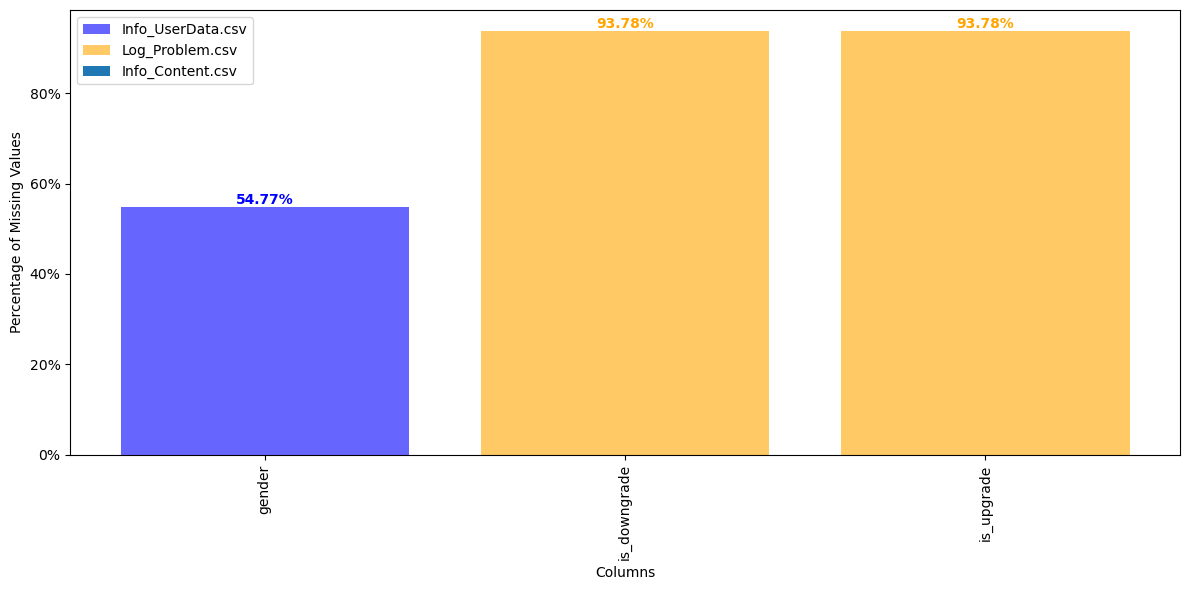

In [100]:

missing_values_InfoUser = df_InfoUser.isnull().sum()
missing_values_LogProblem = df_LogProblem.isnull().sum()
missing_values_InfoContent = df_InfoContent.isnull().sum()


total_rows_InfoUser = len(df_InfoUser)
total_rows_LogProblem = len(df_LogProblem)
total_rows_InfoContent = len(df_InfoContent)

# Calculate the percentage of missing values for each column
percentage_missing_InfoUser = (missing_values_InfoUser / total_rows_InfoUser) * 100
percentage_missing_LogProblem = (missing_values_LogProblem / total_rows_LogProblem) * 100
percentage_missing_InfoContent = (missing_values_InfoContent / total_rows_InfoContent) * 100

# Filter columns with missing values percentage greater than 1%
filtered_missing_InfoUser = percentage_missing_InfoUser[percentage_missing_InfoUser > 1]
filtered_missing_LogProblem = percentage_missing_LogProblem[percentage_missing_LogProblem > 1]
filtered_missing_InfoContent = percentage_missing_InfoContent[percentage_missing_InfoContent > 1]

plt.figure(figsize=(12, 6))
plt.bar(filtered_missing_InfoUser.index, filtered_missing_InfoUser, label='Info_UserData.csv', color='blue', alpha=0.6)
plt.bar(filtered_missing_LogProblem.index, filtered_missing_LogProblem, label='Log_Problem.csv', color='orange', alpha=0.6)
plt.bar(filtered_missing_InfoContent.index, filtered_missing_InfoContent, label='Info_Content.csv', color='green', alpha=0.6)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)

# Format y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Annotate each bar with the precise percentage value
for i, v in enumerate(filtered_missing_InfoUser):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom', color='blue', fontweight='bold')

for i, v in enumerate(filtered_missing_LogProblem):
    plt.text(i + len(filtered_missing_InfoUser), v, f"{v:.2f}%", ha='center', va='bottom', color='orange', fontweight='bold')

for i, v in enumerate(filtered_missing_InfoContent):
    plt.text(i + len(filtered_missing_InfoUser) + len(filtered_missing_LogProblem), v, f"{v:.2f}%", ha='center', va='bottom', color='green', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

INSIGHTS:
Impact on Recommendation Systems->remove Data?

## 2_Check for outliers:

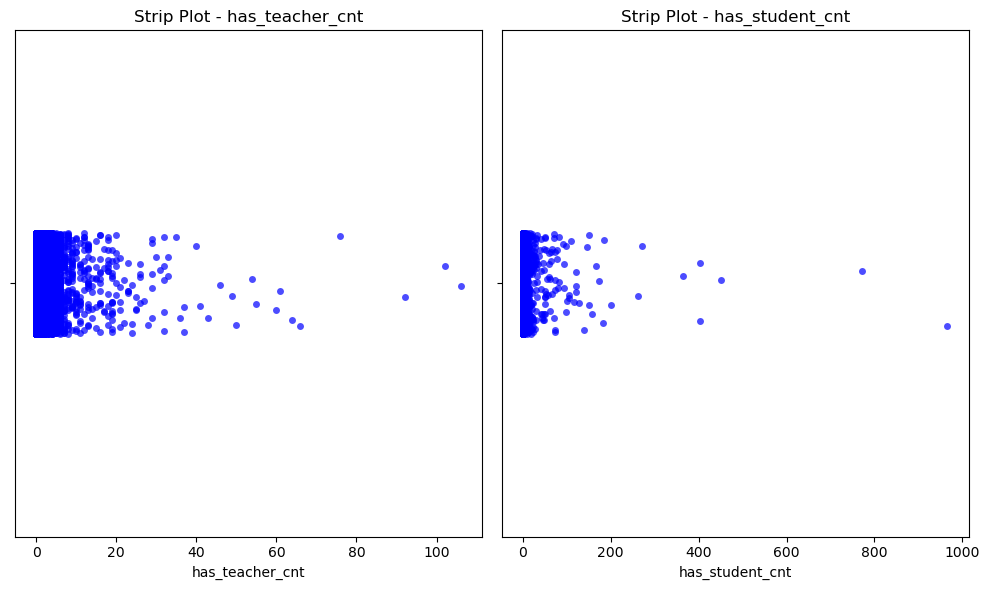

In [101]:
#InfoUser

# Select the two columns with outliers
outlier_columns = ['has_teacher_cnt', 'has_student_cnt']

# Create strip plots to visualize outliers
plt.figure(figsize=(10, 6))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 2, i)
    sns.stripplot(x=df_InfoUser[col], jitter=True, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.title(f'Strip Plot - {col}')
    plt.tight_layout()

plt.show()


INSIGHTS:
1_High Values in has_teacher_cnt: Users with a high number of teachers might indicate that they are part of special programs, advanced courses, or mentorship arrangements. These users could be receiving personalized attention and guidance, which might result in higher engagement and better academic performance.

2_Low Values in has_teacher_cnt: Users with a low number of teachers might represent independent learners who are not enrolled in formal classes or courses with assigned teachers. They might be using the platform for self-paced learning or might have limited access to teacher support.

3_High Values in has_student_cnt: Users with a high number of students might be teachers or tutors who are using the platform to manage and support a large group of students. They might be educators who utilize the platform to assign exercises, track progress, and provide feedback to their students.

4_Low Values in has_student_cnt: Users with a low number of students might indicate individual learners or users who have not yet started interacting with the platform as teachers. It could also represent users who are mainly focused on their own learning and have not taken on a teaching role.

5_Inconsistencies in has_teacher_cnt and has_student_cnt: Anomalies in both columns might reveal inconsistencies in user roles. For example, users with high has_student_cnt but low has_teacher_cnt might be unusual and could indicate data entry errors or inconsistencies in user roles.

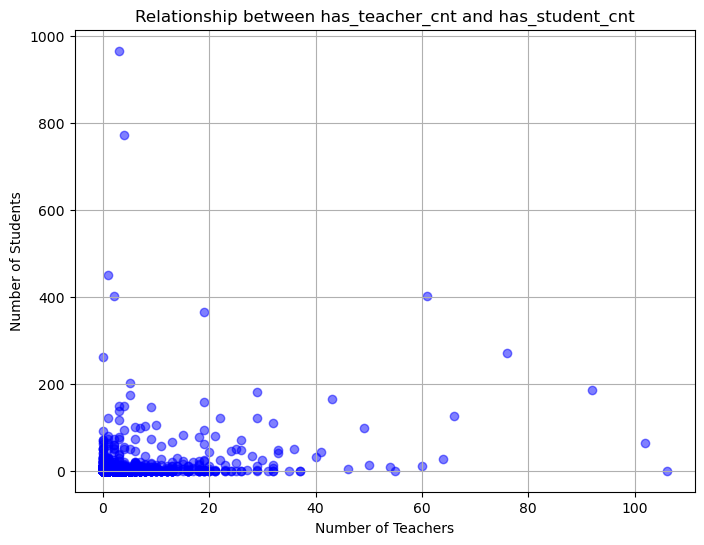

In [102]:
# Filter the data for 'has_teacher_cnt' and 'has_student_cnt'
has_teacher_cnt_values = df_InfoUser['has_teacher_cnt']
has_student_cnt_values = df_InfoUser['has_student_cnt']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(has_teacher_cnt_values, has_student_cnt_values, c='blue', alpha=0.5)
plt.xlabel('Number of Teachers')
plt.ylabel('Number of Students')
plt.title('Relationship between has_teacher_cnt and has_student_cnt')
plt.grid(True)
plt.show()


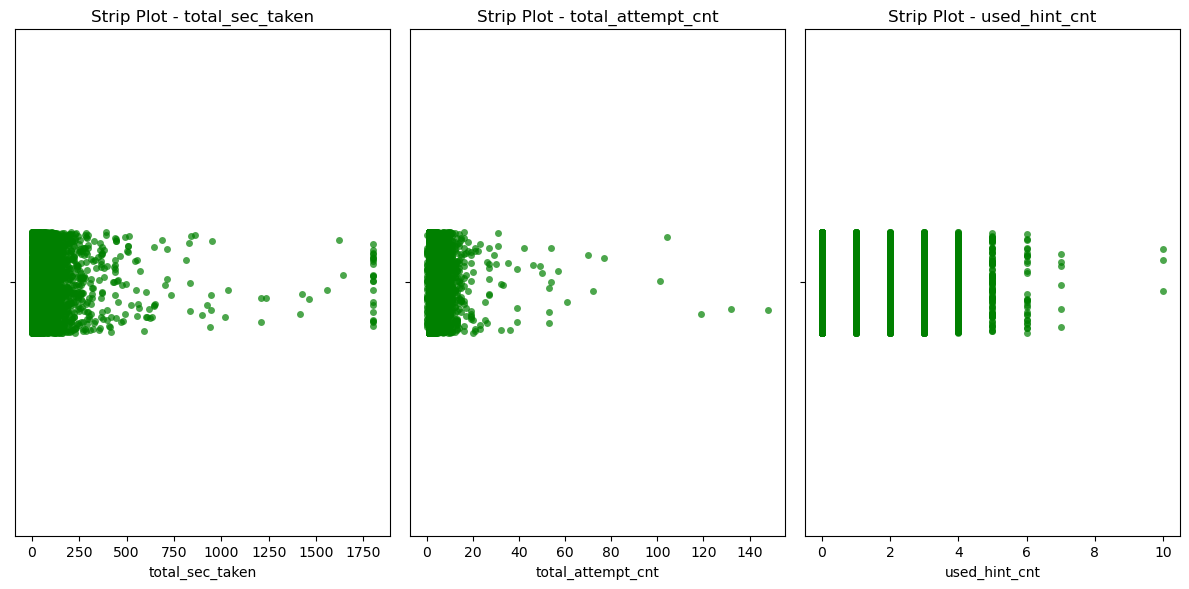

In [103]:
#LogProblem

# Select the columns with numerical data that are considered to have anomalous outliers
outlier_columns = ['total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt']

# Create strip plots to visualize outliers
plt.figure(figsize=(12, 6))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)
    sns.stripplot(x=df_LogProblem[col], jitter=True, color='green', alpha=0.7)
    plt.xlabel(col)
    plt.title(f'Strip Plot - {col}')
    plt.tight_layout()

plt.show()


INSIGHTS:
1_Outliers in 'total_sec_taken': The outliers in this column represent instances where users spent an unusually long time attempting a particular problem. Possible insights from these outliers could include:

   .Users who faced challenging or complex problems and took more time to solve them.
   .Users who encountered technical issues or distractions that prolonged their problem-solving time.
   .Users who intentionally spent more time on exercises to improve their understanding or practice specific skills.

2_Outliers in 'total_attempt_cnt': The outliers in this column indicate instances where users made an exceptionally high number of attempts to solve a problem. Insights from these outliers might include:

   .Users who struggled with specific exercises and made multiple attempts to find the correct solution.
   .Users who engaged in iterative learning, trying different approaches or strategies to solve the problem.
   .Users who might be highly persistent or determined to master a certain concept or topic.

3_Outliers in 'used_hint_cnt': The outliers in this column represent users who used a significant number of hints for a particular problem. Potential insights related to these outliers could be:

   .Users who faced difficult exercises and relied heavily on hints to progress.
   .Users who might need additional support or personalized assistance in understanding the material.
   .Users who could be leveraging hints strategically to optimize their learning experience.

Understanding the reasons behind these outliers can help Junyi Academy tailor their platform and learning resources to better support users with varying learning needs. For example:

For users who spend a long time on exercises, the platform could provide additional resources or adaptive content to address knowledge gaps.

For users who make numerous attempts, the platform could offer targeted feedback or adaptive hints to guide their learning journey effectively.

For users who use many hints, the platform could provide more context-specific explanations or personalized learning paths.

4_Users with 0 'total_sec_taken': Users with a total_sec_taken of 0 likely indicate instances where the users did not spend any time attempting the problem. Insights from these cases might include:

   .Users who accessed the problem but did not engage in any interaction, possibly indicating a lack of interest or motivation.
   .Users who navigated to the problem but left the platform or session before attempting it.
5_Users with 0 'total_attempt_cnt': Users with a total_attempt_cnt of 0 likely indicate cases where the users did not make any attempts to solve the problem. Insights from these cases could include:

   .Users who accessed the problem but did not actively interact or attempt to solve it.
   .Users who might have skipped or ignored the problem intentionally.

Possible actions or improvements could include:

  Identifying potential usability issues or design flaws in the platform that might discourage users from attempting or interacting with problems.

  Providing additional guidance or incentives to encourage users to actively attempt more problems and engage in learning activities.

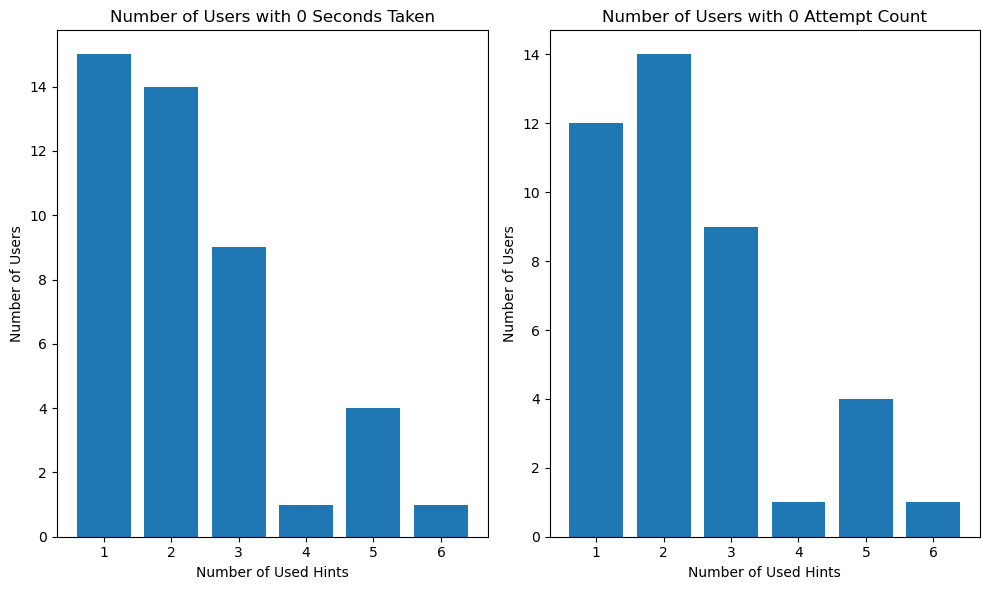

In [104]:
# Filter users with 0 seconds taken or 0 attempt count
zero_sec_taken = df_LogProblem[df_LogProblem['total_sec_taken'] == 0]
zero_attempt_cnt = df_LogProblem[df_LogProblem['total_attempt_cnt'] == 0]

# Count the number of users with 0 seconds taken and their number of used hints
zero_sec_taken_hint_count = zero_sec_taken['used_hint_cnt'].value_counts()
zero_attempt_cnt_hint_count = zero_attempt_cnt['used_hint_cnt'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot for 0 seconds taken
plt.subplot(1, 2, 1)
plt.bar(zero_sec_taken_hint_count.index, zero_sec_taken_hint_count.values)
plt.xlabel('Number of Used Hints')
plt.ylabel('Number of Users')
plt.title('Number of Users with 0 Seconds Taken')

# Plot for 0 attempt count
plt.subplot(1, 2, 2)
plt.bar(zero_attempt_cnt_hint_count.index, zero_attempt_cnt_hint_count.values)
plt.xlabel('Number of Used Hints')
plt.ylabel('Number of Users')
plt.title('Number of Users with 0 Attempt Count')

plt.tight_layout()
plt.show()


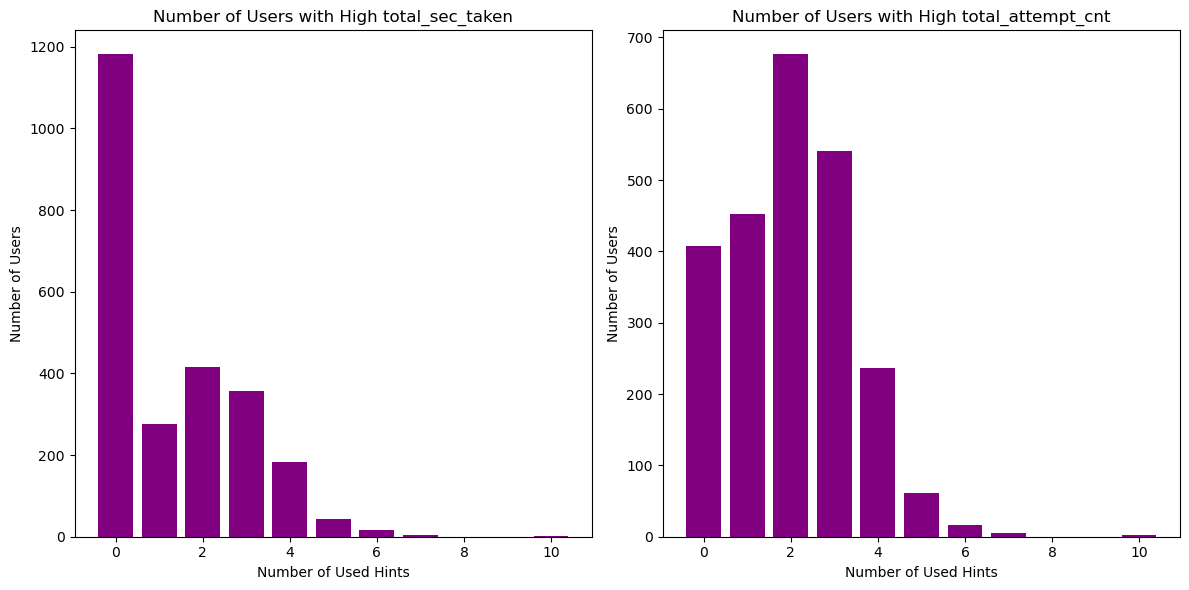

In [105]:

# Define the threshold for high 'total_sec_taken' and 'total_attempt_cnt'
sec_taken_threshold = df_LogProblem['total_sec_taken'].quantile(0.75)
attempt_cnt_threshold = df_LogProblem['total_attempt_cnt'].quantile(0.75)

# Filter users with high 'total_sec_taken' and their number of used hints
high_sec_taken_users = df_LogProblem[df_LogProblem['total_sec_taken'] > sec_taken_threshold]
high_sec_taken_hint_count = high_sec_taken_users['used_hint_cnt'].value_counts()

# Filter users with high 'total_attempt_cnt' and their number of used hints
high_attempt_cnt_users = df_LogProblem[df_LogProblem['total_attempt_cnt'] > attempt_cnt_threshold]
high_attempt_cnt_hint_count = high_attempt_cnt_users['used_hint_cnt'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for high 'total_sec_taken'
plt.subplot(1, 2, 1)
plt.bar(high_sec_taken_hint_count.index, high_sec_taken_hint_count.values,color='purple')
plt.xlabel('Number of Used Hints')
plt.ylabel('Number of Users')
plt.title('Number of Users with High total_sec_taken')

# Plot for high 'total_attempt_cnt'
plt.subplot(1, 2, 2)
plt.bar(high_attempt_cnt_hint_count.index, high_attempt_cnt_hint_count.values,color='purple')
plt.xlabel('Number of Used Hints')
plt.ylabel('Number of Users')
plt.title('Number of Users with High total_attempt_cnt')

plt.tight_layout()
plt.show()


# The distribution of students across different learning stages:

In [121]:
learning_stages_count = df_InfoContent['learning_stage'].value_counts()
total_students = len(df_InfoContent)

# Calculate the percentage for each learning stage
percentage_per_stage = (learning_stages_count / total_students) * 100

# Create the bar plot
fig = go.Figure(data=[go.Bar(x=learning_stages_count.index, y=learning_stages_count.values)])

# Add text annotations above each bar with value counts and percentages
for i in range(len(learning_stages_count)):
    value_count = learning_stages_count.values[i]
    percentage = percentage_per_stage.values[i]
    text = f"{value_count} ({percentage:.2f}%)"
    fig.add_annotation(
        x=learning_stages_count.index[i],
        y=learning_stages_count.values[i],
        text=text,
        showarrow=True,
        arrowhead=1
    )

# Customize the layout
fig.update_layout(
    title='Distribution of Students Across Learning Stages',
    xaxis_title='Learning Stage',
    yaxis_title='Number of Students',
    showlegend=False
)

# Show the plot
fig.show()


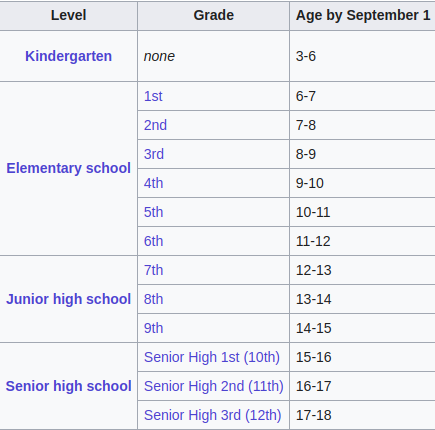

In [38]:
from IPython.display import Image

# Specify the path to the image file
image_path = '/home/dorra/Pictures/3.png'

# Display the image
Image(filename=image_path)


# The distribution of difficulties of the exercises:

In [76]:
import plotly.graph_objects as go

# Sample data (replace this with your actual data)
difficulty_distribution = df_InfoContent['difficulty'].value_counts()

# Define colors for the pie/donut chart
colors = ['blue', 'green', 'orange', 'red']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=difficulty_distribution.index, values=difficulty_distribution.values, marker=dict(colors=colors))])

# Customize the layout
fig.update_layout(title='Distribution of Difficulties of Exercises')

# Show the plot
fig.show()


# The number of students who have attempted to answer the problems in the exercises:

In [26]:
unique_students_attempted = df_LogProblem['uuid'].nunique()
print(unique_students_attempted)


6780


#  The average number of problems in a single exercise:

In [23]:
average_occurrences_per_exercise = int(df_LogProblem.groupby('ucid').size().mean())

print("Total Number of Exercises:", len(df_InfoContent['ucid']))
print("Total Number of Problem attempts:", len(df_LogProblem['ucid']))
print("Total Number of Exercise attempts:", df_LogProblem['ucid'].nunique())
print("Average Number of Problems per Exercise:", average_occurrences_per_exercise)


Total Number of Exercises: 1330
Total Number of Problem attempts: 10000
Total Number of Exercise attempts: 1059
Average Number of Problems per Exercise: 9


#  The average number of hints used per student per exercise:

In [33]:
average_hints_per_student = int(df_LogProblem.groupby(['ucid','uuid'])['used_hint_cnt'].size().mean())
print(average_hints_per_student)


1


#  The average number of attempts per student per exercise:

In [35]:
average_attempts_per_student = int(df_LogProblem.groupby(['uuid', 'ucid'])['total_attempt_cnt'].size().mean())
print(average_attempts_per_student)


1
